<a target="_blank" href="https://colab.research.google.com/github/estocasticos-udem/clases-2023-2/blob/main/clase3_10-08-2023.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Clase 4

* **Tema**: Variables aleatorias
* **Fecha**: 07/09/2023

## Variables aleatorias

En construcción...



**Ejemplo 2**: Suponga un experimento que consiste en lanzar una moneda no cargada tres veces
1. D


In [40]:
# Espacio muestral

moneda_1 = ['H', 'T']
moneda_2 = ['H', 'T']
moneda_3 = ['H', 'T']

# Espacio muestral
S = list(itertools.product(moneda_1, moneda_2,moneda_3))
caras = [s_i.count('H') for s_i in S]
# print(S)
# print(caras)

df = pd.DataFrame({'S': S, 'caras': caras})
df



,S,caras
0,"(H, H, H)",3
1,"(H, H, T)",2
2,"(H, T, H)",2
3,"(H, T, T)",1
4,"(T, H, H)",2
5,"(T, H, T)",1
6,"(T, T, H)",1
7,"(T, T, T)",0


In [50]:
#pd.DataFrame(df.groupby("caras", group_keys=True).value_counts())
df_caras = pd.DataFrame(df.groupby("caras").value_counts())
df_caras

0
caras S         prob    
0     (T, T, T) 0.000  1
1     (H, T, T) 0.125  1
      (T, H, T) 0.125  1
      (T, T, H) 0.125  1
2     (H, H, T) 0.250  1
      (H, T, H) 0.250  1
      (T, H, H) 0.250  1
3     (H, H, H) 0.375  1

In [51]:
N = df.shape[0]
P = 1/N
df['prob'] = P
df

,S,caras,prob
0,"(H, H, H)",3,0.125
1,"(H, H, T)",2,0.125
2,"(H, T, H)",2,0.125
3,"(H, T, T)",1,0.125
4,"(T, H, H)",2,0.125
5,"(T, H, T)",1,0.125
6,"(T, T, H)",1,0.125
7,"(T, T, T)",0,0.125


In [68]:
x = [0, 1, 2, 3]
prob_model = {}
for x_i in x:
    prob_x_i = df["prob"].where(df["caras"] == x_i).dropna().sum()
    print(f"x = {x_i} --> P(X = {x_i}) = {prob_x_i}")
    prob_model[x_i] = prob_x_i
print(prob_model)
df_model = pd.DataFrame({"x": prob_model.keys(), "P(x)": prob_model.values()}) 
df_model = df_model.set_index('x')
df_model

x = 0 --> P(X = 0) = 0.125
x = 1 --> P(X = 1) = 0.375
x = 2 --> P(X = 2) = 0.375
x = 3 --> P(X = 3) = 0.125
{0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125}


,P(x)
x,
0,0.125
1,0.375
2,0.375
3,0.125


In [78]:
x

[0, 1, 2, 3]

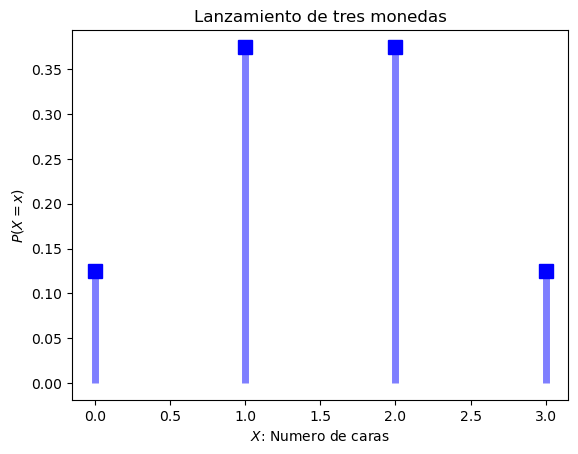

In [82]:
# Grafica
plt.plot(x, df_model["P(x)"], 'bs', ms=10)
plt.vlines(x, 0, df_model["P(x)"], colors='b', lw = 5, alpha=0.5)
plt.xlabel("$X$: Numero de caras")
plt.ylabel("$P(X = x)$")
plt.title("Lanzamiento de tres monedas")
plt.show()

**Ejemplo 1**: 
Un psicólogo infantil se interesa por el número de veces que el llanto de un recién nacido despierta a su madre después de la medianoche. Para una muestra aleatoria de 50 madres, se obtuvo la siguiente información. 

|$x$|$P_X(x)$|
|---|---|
|0|$P_X(x = 0) = \frac{2}{50}$|
|1|$P_X(x = 1) = \frac{11}{50}$|
|2|$P_X(x = 2) = \frac{23}{50}$|
|3|$P_X(x = 3) = \frac{9}{50}$|
|4|$P_X(x = 4) = \frac{4}{50}$|
|5|$P_X(x = 5) = \frac{1}{50}$|

Donde:
* **VA**: $X$ numero de el número de veces por semana que el llanto de un recién nacido despierta a su madre después de la medianoche.
* **Valores que toma la VA**: $x = {0,1,2,3,4,5}$


In [53]:
# Simulacion en python



Forma 1 - Usando indices
['B', 'B', 'R', 'R', 'R']
Bola 0: [0] -> B
Bola 1: [4] -> R
Forma 2 - Usando random.choice
['B', 'B', 'R', 'R', 'R']
Bola 0: R
Bola 1: R
Forma 3 - Usando random.choices
['B', 'B', 'R', 'R', 'R']
Bolas elegidas: ['R', 'R']
Bola 0: R
Bola 1: R


**Ejemplo 2 - Muestreo sin reemplazo**: 
Se tiene una bolsa con dos bolas azules y cinco bolas rojas. Supongamos que se sacan dos bolas pero no se vuelve a poner ninguna en la bolsa. Realizar la simulación en python.

Forma 1 - Usando indices
Poblacion inicial: ['B', 'B', 'R', 'R', 'R']
Experimento 0: [1] -> B; Poblacion restante: ['B', 'R', 'R', 'R']
Experimento 1: [0] -> B; Poblacion restante: ['R', 'R', 'R']
Forma 2 - Usando el metodo sample
Poblacion inicial: ['B', 'B', 'R', 'R', 'R']
Bolas elegidas: ['R', 'B']


## Ejercicio

Se tiene un mazo de cartas imparcial y bien mezclado de 52 cartas. Consta de cuatro palos. Los palos son tréboles, diamantes, corazones y picas. Hay 13 cartas en cada palo que consisten en 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, J (sota), Q (reina) y K (rey) de ese palo. P = picas, C = corazones, D = diamantes T = tréboles. Si se sacan cuatro cartas, simule en python los casos cuando el muestreo es:
1. Con reemplazo (**Pista**: Use la función ```random.choices```)
2. Sin reemplazo (**Pista**: Use la función ```random.select```)


In [67]:
# Muestreo con reemplazo
# Coloque el codigo abajo...



In [68]:
# Muestreo sin reemplazo
# Coloque el codigo abajo...



En construcción...

## Tablas de contingencia

## Referencias

1. https://pynative.com/python-random-sample/
2. https://www.educative.io/answers/what-is-randomsample-in-python
3. https://note.nkmk.me/en/python-random-choice-sample-choices/
4. https://www.boardinfinity.com/blog/random-sample-in-python/
5. https://www.codecademy.com/resources/docs/python/random-module/choice
6. https://maxhalford.github.io/blog/weighted-sampling-without-replacement/
7. https://sparkbyexamples.com/numpy/how-to-use-numpy-random-choice-in-python/
8. https://www.educative.io/answers/what-is-the-randomchoices-method-in-python
9. https://www.w3schools.com/python/ref_random_choices.asp
10. https://www.geeksforgeeks.org/random-choices-method-in-python/
11. https://interactivechaos.com/en/python/function/randomchoice
12. https://docs.python.org/es/3/library/random.html
13. https://www.geeksforgeeks.org/randomly-select-elements-from-list-without-repetition-in-python/
14. https://openstax.org/details/books/contemporary-mathematics
15. https://realpython.com/python-itertools/
16. https://www.pythoncheatsheet.org/modules/itertools-module
17. 